# Import required libraries

In [1]:
%matplotlib inline

import datacube
from datacube.testutils import io
import sys
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

sys.path.append("../Scripts")
from deafrica_bandindices import calculate_indices

# Import Level 1 data - from file
tiffs in same folder as this ipynb.

B3 is Band 3 - Landsat 8 green band

B6 is Band 6 - Landsat 8 SWIR 1 band

In [2]:
l1_green = io.rio_slurp_xarray('LC08_L1TP_204052_20180109_20180119_01_T1_B3.tiff')
l1_swir1 =  io.rio_slurp_xarray('LC08_L1TP_204052_20180109_20180119_01_T1_B6.tiff')

Combine into an xarray dataset

In [3]:
ds_l1 = l1_green.to_dataset(name = 'green')
ds_l1['swir1'] = l1_swir1
ds_l1

<xarray.Dataset>
Dimensions:      (x: 7601, y: 7761)
Coordinates:
  * y            (y) float64 1.395e+06 1.395e+06 ... 1.162e+06 1.162e+06
  * x            (x) float64 3.039e+05 3.039e+05 ... 5.319e+05 5.319e+05
    spatial_ref  int32 32628
Data variables:
    green        (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    swir1        (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

# Import Level 2 data - from datacube

Load green and swir1 bands only.

In [4]:
dc = datacube.Datacube(app='s2')

# Show all datacube products
#dc.list_products()

query = {}
query['product'] = 'ls8_usgs_sr_scene'
query['id'] = '13b9c5f0-65f0-5d2e-8473-5bbfc92a9673'
query['measurements'] = ['green','swir1']

In [5]:
ds_l2 = dc.find_datasets(**query)
query['output_crs'] = ds_l2[0].metadata_doc['grid_spatial']['projection']['spatial_reference']
query['resolution'] = (-30,30)
query['align'] = (15,15)

In [6]:
l2_data = dc.load(**query)
#l2_data

In [7]:
#np.testing.assert_allclose(ds_l1['x'].values, l2_data.x.values)
# Checks if the x values match

# Calculate Level 2 MNDWI

In [8]:
# This def is from Caitlin's notebook, note NVDI and NDWI have been removed here
# Note typo in original def - MNDWI incorrectly uses NIR in the denominator

def calculate_band_indices(dc):
    dc['mndwi'] = (dc.green - dc.swir1)/(dc.green + dc.swir1)
    return(dc)

dc_level2 = calculate_band_indices(l2_data)

## ... and plot

In [9]:
#dc_level2['mndwi'].plot(figsize=(10,10))

# Calculate Level 1 MNDWI

In [10]:
ds_l1 = calculate_indices(ds_l1, index = 'MNDWI', collection = 'c1') # use drop = True to get rid of bands

In [11]:
#ds_l1

## ... and plot

In [12]:
#ds_l1.MNDWI.plot(figsize=(10,10))

# Subplots drama starts here

In [13]:
# fig, axes = plt.subplots(ncols=2)

# ds_l1.MNDWI.plot(ax = axes[0])
# dc_level2['mndwi'].plot(ax = axes[1])

# plt.draw()

In [14]:
# fig3 = plt.figure(figsize=(18,6))
# fig3.suptitle("Comparison of MNDWI between Level-1 (LHS) and Level-2 (RHS)")

# plt.subplot(1, 2, 1)
# ds_l1.MNDWI.plot(cmap='RdBu', vmin=-1, vmax=1)

# plt.subplot(1, 2, 2)
# dc_level2.mndwi.plot(cmap='RdBu', vmin=-1, vmax=1)

# plt.show()

In [15]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# ds_l1.MNDWI.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax1)
# # ax1.set_title('Baseline NBR')
# # ax1.set_xlabel('X coordinate')

# dc_level2['mndwi'].plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax2)
# # ax2.set_title('Post-fire NBR with MODIS Hotspots')
# # ax2.set_xlabel('X coordinate')

# # plt.show()

In [16]:
# fig, axs = plt.subplots(2)

# ds_l1['MNDWI'].plot(ax = axs[0])

# dc_level2['mndwi'].plot(ax = axs[1])

In [17]:
# f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))

# l1mndwi.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax1)
# ax1.set_title('Baseline NBR')
# ax1.set_xlabel('X coordinate')

# l2mndwi.plot(cmap='RdBu', vmin=-1, vmax=1, ax=ax2)
# ax2.set_title('Baseline NBR')
# ax2.set_xlabel('X coordinate')

# plt.show()

In [18]:
# l1mndwi = ds_l1.MNDWI
# l2mndwi = dc_level2.mndwi #.isel(time=0)

# fig, ax = plt.subplots(1, 2, figsize=(12, 12))
# l1mndwi.plot(ax=ax[0])
# l2mndwi.plot(ax=ax[1])

# I hate plots. Let's try plotting other data

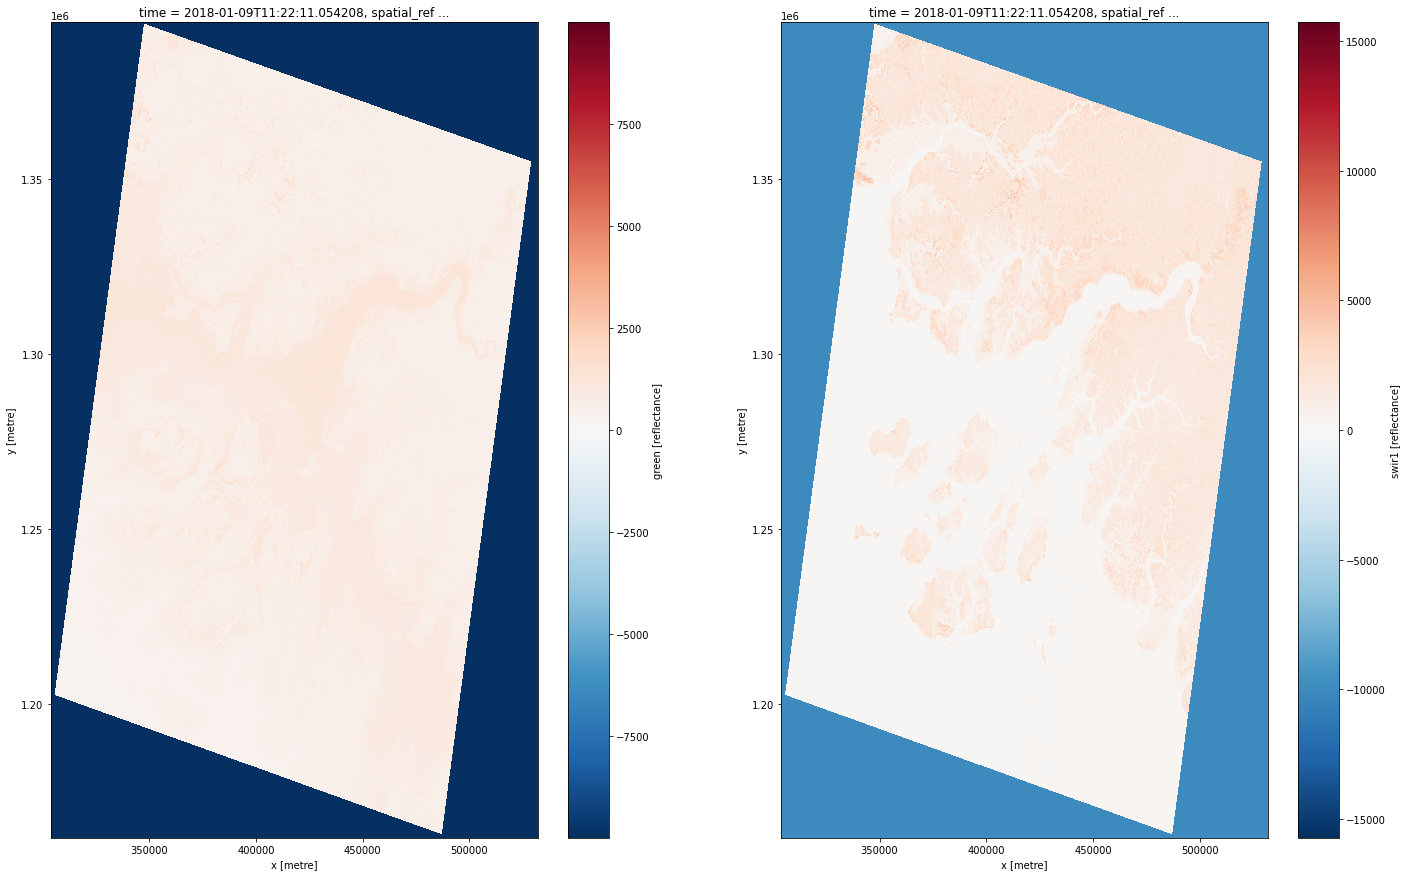

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(24,15))

dc_level2.squeeze().green.plot(ax=ax[0])
dc_level2.squeeze().swir1.plot(ax=ax[1])

# ds_l1.green.plot(ax=ax[0])
# ds_l1.swir1.plot(ax=ax[1])

In [20]:
#ds_l1.green.plot(figsize = (10,10))

In [21]:
#dc_level2

In [ ]:
# Plot trials from good copy notebook

# fig2, ax = plt.subplots(1, 2, figsize=(28,13))
# fig2.suptitle("Rio Mansoa MNDWI", size = 25)

# l1_data.squeeze().MNDWI.plot(ax=ax[0], x = [350000,400000])
# ax[0].set_title('Level 1 MNDWI', size = 20)

#incomplete
#l1_data = l1_data.set_index()

#works without y slice
#l1_data.MNDWI.sel(x = slice(350000, 400000), y = slice(1300000, 1350000)) #.plot(figsize=(10,10))

#l1test = l1_data.MNDWI.sel(x = slice(350000, 400000), y = slice(1300000,)).plot(figsize=(10,10))
#l1test = l1test.sel(y = slice(1300000,))
#l1test.plot(figsize=(10,10))

#l1_data.MNDWI.sel(x = slice(350000, 400000), y = slice(1350000,1300000)).plot(figsize=(10,10))

In [ ]:
#more notes!
import seaborn as sns

histl1 = l1_data.MNDWI.sel(x = slice(zoomed_xmin, zoomed_xmax), y = slice(zoomed_ymax, zoomed_ymin)).values.ravel()
histl2 = l2_data.MNDWI.sel(x = slice(zoomed_xmin, zoomed_xmax), y = slice(zoomed_ymax, zoomed_ymin)).values.ravel()

fig4, ax = plt.subplots(1, figsize=(11, 6))
fig4.suptitle("Rio Baboque - Frequency Histogram", size = 25)

h1 = sns.distplot(histl1)
h2 = sns.distplot(histl2)

ax.set_xlabel('MNDWI')
ax.set_ylabel('Frequency')
ax.legend([h1, h2], labels = ['Level 1 Data', 'Level 2 Data'], loc = 'upper right')

print(len(histl1[np.where(histl1 > 0)]))
print(len(histl1[np.where(histl1 < 0)]))
print(len(histl1))

print(len(histl2[np.where(histl2 > 0)]))
print(len(histl2[np.where(histl2 < 0)]))
print(len(histl2))